<font size = 6>Определение перспективного тарифа для телеком-компании</font>

## <a name="0.0"></a>Содержание:
* [0. Описание проекта](#0.1)
* [1. Загрузка данных, обработка, импорт библиотек](#1)
     - [1.1 Таблица calls](#1.1)
       + [1.1.1 Выводы по таблице calls](#1.1.1)
     - [1.2 Таблица internet](#1.2)
       + [1.2.1 Выводы по таблице internet](#1.2.1)
     - [1.3 Таблица messages](#1.3)
       + [1.3.1 Выводы по таблице messages](#1.3.1)
     - [1.4 Таблица tariffs](#1.4)
       + [1.4.1 Выводы по таблице tariffs](#1.4.1)
     - [1.5 Таблица users](#1.5)
       + [1.5.1 Выводы по таблице users](#1.5.1)
     - [1.6 Вывод:](#1.6)
* [2. Подсчет и добавление новых столбцов](#2)
     - [2.1 Меняем тип столбцов](#2.1)
     - [2.2 Добавляем столбец с месяцем](#2.2)
     - [2.3 Добавляем кол-во минут, смс и интернета](#2.3)     
     - [2.4 Заполняем пропуски](#2.4)
     - [2.5 Добавление информации о помесячной выручки с каждого пользователя](#2.5)
* [3. Анализ данных](#3)  
     - [3.1. Диаграммы сравнения переплат](#3.1)
     - [3.2 Перплаты](#3.2)
     - [3.3 Какие услуги чаще заказывают и сравнение суммарной выручки](#3.3)
     - [3.4 Промежуточный вывод по анализу](#3.4)
     - [3.5 Описание поведения клиента на основе полученной выборки](#3.5)
     - [3.6 Определение интервалов данных для последующей их фильтрации](#3.6)
     - [3.7 Строим гистограммы](#3.7)
* [4. Проверка гипотез:](#4)
     - [4.1 Первая гипотеза: о различии в средней выручке по тарифам](#4.1)
       + [4.1.1 Нулевая гипотеза](#4.1.1)
       + [4.1.2 Итог](#4.1.2)     
     - [4.2 Вторая гипотеза: о различии в средней выручке между Москвой и другими регионами](#4.2)
       + [4.2.1 Нулевая гипотеза](#4.2.1)
       + [4.2.2 Итог](#4.2.2)
* [5. Общий вывод](#5)

## <b>Описание проекта</b><a name='0.1'></a>

**Задача проекта**

<font size=2>Нужно проанализировать поведение клиентов на основе имеющихся данных и сделать вывод в какой из тарифов лучше вкладывать рекламный бюджет.</font>

__Описание данных__

__Таблица users (информация о пользователях):__
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tarif — название тарифного плана

__Таблица calls (информация о звонках):__
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

__Таблица messages (информация о сообщениях):__
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

__Таблица internet (информация об интернет-сессиях):__
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

__Таблица tariffs (информация о тарифах):__
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

**Описание тарифов**

**Тариф <font color = 'blue'>«Смарт»</font>**
- Ежемесячная плата: 550 рублей
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
    - минута разговора: 3 рубля
    - сообщение: 3 рубля
    - 1 Гб интернет-трафика: 200 рублей

**Тариф <font color = 'purple'>«Ультра»</font>**
- Ежемесячная плата: 1950 рублей
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
    - минута разговора: 1 рубль
    - сообщение: 1 рубль
    - 1 Гб интернет-трафика: 150 рублей

## <b>Загружаем данные импортируем библиотеки, обрабатываем данные</b><a name = '1'></a>
<font size="2">([к содержанию](#0.0))</font><br/>

In [1]:
import pandas as pd
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import warnings

warnings.filterwarnings("ignore")

In [2]:
# Выгрузим все таблицы
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

### <b>Таблица calls</b><a name = '1.1'></a></br>

In [3]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Так как оператор округляет до большего целого секунды, округим все значения в продолжительностью до целого

In [5]:
calls['duration'] = calls['duration'].apply(np.ceil)
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000


Построим гистограмму распределение длительности звонков

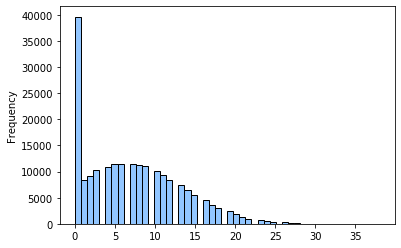

In [6]:
plt.style.use('seaborn-pastel')
calls['duration'].plot(kind='hist', ec='black', bins=50)

Очень много звоков около 0 даже после округления, посмотри на их кол-во.

In [7]:
calls.query('duration == 0')

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
5,1000_5,2018-11-02,0.0,1000
6,1000_6,2018-10-18,0.0,1000
9,1000_9,2018-08-15,0.0,1000
...,...,...,...,...
202590,1499_203,2018-12-03,0.0,1499
202592,1499_205,2018-10-13,0.0,1499
202593,1499_206,2018-12-26,0.0,1499
202594,1499_207,2018-10-28,0.0,1499


Достаточно много почти 25% от общих звонков. Но т.к. в пояснение сказано, что это не ошибка удалять их не будем.

#### Вывод по таблице calls<a name = '1.1.1'></a> 
- изменить тип столбца с датой
- округлили значение в большую сторону

### <b>Таблица internet</b><a name = '1.2'></a></br>

In [8]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [9]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Не понятный столбец Unnamed: 0, попробуем разобраться не дублирует ли он id строк

In [10]:
internet.columns

Index(['Unnamed: 0', 'id', 'mb_used', 'session_date', 'user_id'], dtype='object')

In [11]:
internet['Unnamed: 0'].duplicated().sum()

0

In [12]:
internet.tail()

,Unnamed: 0,id,mb_used,session_date,user_id
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499
149395,149395,1499_156,544.37,2018-10-26,1499


Дубликатов нет, кол-во строк такое же, этот столбец не нужен, удаляем.

In [13]:
internet.drop(columns='Unnamed: 0', axis=1)

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


In [15]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


Посмотрим на распределение интернет трафика

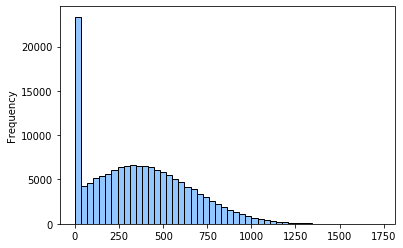

In [16]:
plt.style.use('seaborn-pastel')
internet['mb_used'].plot(kind='hist', ec='black', bins=50)

In [17]:
internet.query('mb_used == 0')

,Unnamed: 0,id,mb_used,session_date,user_id
11,11,1000_11,0.0,2018-08-28,1000
38,38,1000_38,0.0,2018-11-27,1000
46,46,1000_46,0.0,2018-06-30,1000
67,67,1000_67,0.0,2018-06-16,1000
72,72,1000_72,0.0,2018-06-15,1000
...,...,...,...,...,...
149380,149380,1499_141,0.0,2018-12-11,1499
149381,149381,1499_142,0.0,2018-11-01,1499
149383,149383,1499_144,0.0,2018-11-27,1499
149386,149386,1499_147,0.0,2018-10-21,1499


Много нулевого трафика. 
Возможно была попытка подключение но связь обрывалась. Либо в автоматическом режиме устройства пытались обновиться но было не достаточно стабильный сигнал. 
В любом случаи такие строки нам не к чему, т.к как они не отразят нужны данных для поставленой задачи

In [18]:
internet['mb_used'] = internet['mb_used'].replace(0.0, np.NaN)
internet = internet.dropna()

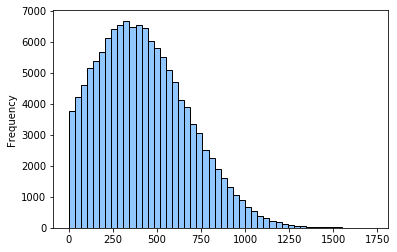

In [19]:
plt.style.use('seaborn-pastel')
internet['mb_used'].plot(kind='hist', ec='black', bins=50)

#### <b>Вывод по таблице internet</b><a name=1.2.1></a>
- Убрали Unnamed: 0
- Нужно будет изменить столбец с датой
- Убрали нулевые трафики

### <b>Таблица messages</b><a name = '1.3'></a></br>

In [20]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [21]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


#### <b>Вывод по таблице messages</b><a name=1.3.1></a>
- Изменить тип столбца с датой

### <b>Таблица tariffs</b><a name = '1.4'></a></br>

In [22]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [23]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


#### <b>Вывод по таблице tariffs</b><a name=1.4.1></a>
Справочная таблица

### <b>Таблица users</b><a name = '1.5'></a></br>

In [24]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [25]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [26]:
# Проверим на уникальных пользователей
print("Число уникальных пользователей:", users['user_id'].count())
print("Число строк:", users.shape[0])
print("Количество дубликатов:", users.duplicated().sum())


Число уникальных пользователей: 500
Число строк: 500
Количество дубликатов: 0


#### <b>Вывод по таблице users</b><a name = '1.5.1'></a></br>
- Все пользователей уникальны
- Изменить тип столбца с датой и id пользователей
- Пропущенные значение можно оставить, т.к не влияют на цели

### <b>Общий Вывод:</b><a name = '1.6'></a></br>
* Явных пропущенных значений нет 
* Названия всех столбцов приведены к единому стилю, в целом данные собраные хорошо. 
* Основная предобработка данных была сделана.

## <b>Подсчет и добавление новых столбцов</b><a name = '2'></a></br>
<font size="2">([к содержанию](#0))</font><br/>

### <b>Меняем тип столбцов</b><a name = '2.1'></a></br>

In [27]:
#Изменим типы столбцов:
users['user_id'].astype('object')
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')
internet['mb_used'].astype('int64')
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')
calls['duration'].astype('int64')
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')

### <b>Добавляем столбец с месяцем</b><a name = '2.2'></a></br>

In [30]:
users['month'] = pd.DatetimeIndex(users['reg_date']).month
messages['month'] = pd.DatetimeIndex(messages['message_date']).month
internet['month'] = pd.DatetimeIndex(internet['session_date']).month
calls['month'] = pd.DatetimeIndex(calls['call_date']).month

In [31]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,11
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra,8
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5


In [32]:
messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


In [33]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,112.95,2018-11-25,1000,11
1,1,1000_1,1052.81,2018-09-07,1000,9
2,2,1000_2,1197.26,2018-06-25,1000,6
3,3,1000_3,550.27,2018-08-22,1000,8
4,4,1000_4,302.56,2018-09-24,1000,9


In [34]:
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.0,1000,7
1,1000_1,2018-08-17,0.0,1000,8
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12


### <b>Добавляем кол-во минут, смс и интернета</b><a name = '2.3'></a></br>

Посмотрим каким видом связи пользуются чаще всего

In [35]:
def barplot_by_month(dfs, query=None):
    list_of_dfs = dfs
    plt.figure(figsize=(15,5))
    ax = plt.gca()
    
    list_of_colors = ['forestgreen', 'grey', 'mediumaquamarine']

    dfs_names_for_legend = ['Кол-во звонков', 'Кол-во отпр. СМС', 'Кол-во интернет-сессий']
    legend_list = []

    for i in range(len(list_of_dfs)):
        curr_df = list_of_dfs[i]
        if query == None:
            curr_df_prepared = curr_df.groupby('month')['id'].count().reset_index()
        else:
            curr_df_prepared = curr_df.query(query).groupby('month')['id'].count().reset_index()
        plot = curr_df_prepared.plot(x='month', y='id', kind='bar', ec='black', color=list_of_colors[i],
                                 ax=ax, width=0.1, position=i)
        legend_list.append(dfs_names_for_legend[i])
    plt.xticks(rotation=0)
    ax.legend(legend_list)

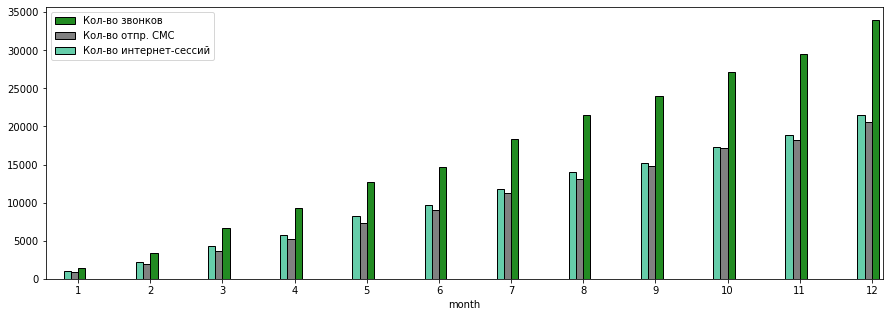

In [36]:
barplot_by_month([calls, messages, internet])

Показания везде одинаковые, чаще звонят реже отправляют смс. Так же судя по нарастающим данным можно прежположить что тарифы запустили только год назад.

Подсчитаем количество совершенных каждым пользователям звоноков, отправленных смс и израсходованого трафика.

In [37]:
num_of_calls = calls.groupby(['user_id', 'month'])['duration'].agg(['count', 'sum'])
num_of_messages = messages.groupby(['user_id', 'month'])['id'].count()
num_of_internet = internet.groupby(['user_id', 'month']).sum()['mb_used'] 

In [38]:
df_event_numbers = pd.concat([num_of_calls, num_of_messages, num_of_internet], axis=1)
df_event_numbers = df_event_numbers.reset_index()
df_event_numbers.rename(columns = {'mb_used' : 'gb_used'}, inplace = True)
df_event_numbers.head()

,user_id,month,count,sum,id,gb_used
0,1000,5,22.0,159.0,22.0,2253.49
1,1000,6,43.0,172.0,60.0,23233.77
2,1000,7,47.0,340.0,75.0,14003.64
3,1000,8,52.0,408.0,81.0,14055.93
4,1000,9,58.0,466.0,57.0,14568.91


In [39]:
#Добавим столбец с тарифом и городом
map_to_fill_tariff = dict(pd.Series(users['tariff'].values, index=users['user_id']))
df_event_numbers['Тариф'] = df_event_numbers['user_id'].map(map_to_fill_tariff)
map_to_fill_city = dict(pd.Series(users['city'].values, index=users['user_id']))
df_event_numbers['Город'] = df_event_numbers['user_id'].map(map_to_fill_city)

In [40]:
#Переименуме столбцы
df_event_numbers.columns = ['User_id', 'Месяц', 'Кол-во звонков, шт.', 'Звонки, мин.', 
                            'СМС, шт.', 'Интернет, Мб', 'Тариф', 'Город']

In [41]:
df_event_numbers.sort_values(by=['User_id', 'Месяц']).head(10)

,User_id,Месяц,"Кол-во звонков, шт.","Звонки, мин.","СМС, шт.","Интернет, Мб",Тариф,Город
0,1000,5,22.0,159.0,22.0,2253.49,ultra,Краснодар
1,1000,6,43.0,172.0,60.0,23233.77,ultra,Краснодар
2,1000,7,47.0,340.0,75.0,14003.64,ultra,Краснодар
3,1000,8,52.0,408.0,81.0,14055.93,ultra,Краснодар
4,1000,9,58.0,466.0,57.0,14568.91,ultra,Краснодар
5,1000,10,57.0,350.0,73.0,14702.49,ultra,Краснодар
6,1000,11,43.0,338.0,58.0,14756.47,ultra,Краснодар
7,1000,12,46.0,333.0,70.0,9817.61,ultra,Краснодар
8,1001,11,59.0,430.0,NaN,18429.34,smart,Москва
9,1001,12,63.0,414.0,NaN,14036.66,smart,Москва


In [42]:
df_event_numbers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 8 columns):
User_id                3214 non-null int64
Месяц                  3214 non-null int64
Кол-во звонков, шт.    3174 non-null float64
Звонки, мин.           3174 non-null float64
СМС, шт.               2717 non-null float64
Интернет, Мб           3201 non-null float64
Тариф                  3214 non-null object
Город                  3214 non-null object
dtypes: float64(4), int64(2), object(2)
memory usage: 201.0+ KB


### <b>Заполняем пропуски</b><a name = '2.4'></a></br>

Пропуски есть во всех столбцах с подсчетами, проверим есть ли строки где во всех столбцах нулевые значения.

In [43]:
df_event_numbers[(df_event_numbers['Интернет, Мб'].isnull()) & (df_event_numbers['СМС, шт.'].isnull()) &
                 (df_event_numbers['Звонки, мин.'].isnull())]

,User_id,Месяц,"Кол-во звонков, шт.","Звонки, мин.","СМС, шт.","Интернет, Мб",Тариф,Город


Таких строк нет, значит некоторые пользователя либо непользуются интернетом, либо смс, либо звонками.

Поэтому проставим по имеющимся пропускам нули, которые будут означать, что в конкретном месяце данный клиент не звонил/не отправлял СМС/не пользовался интернетом:

In [44]:
df_event_numbers = df_event_numbers.fillna(0)

In [45]:
df_event_numbers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 8 columns):
User_id                3214 non-null int64
Месяц                  3214 non-null int64
Кол-во звонков, шт.    3214 non-null float64
Звонки, мин.           3214 non-null float64
СМС, шт.               3214 non-null float64
Интернет, Мб           3214 non-null float64
Тариф                  3214 non-null object
Город                  3214 non-null object
dtypes: float64(4), int64(2), object(2)
memory usage: 201.0+ KB


### <b>Добавление информации о помесячной выручки с каждого пользователя<a name='2.5'></a></b>

Разобьем на 3 группы столбцов:
* <b>"Аб. плата"</b>;
* <b>"Минуты сверх", "СМС сверх", "Мб сверх", "Плата сверх лимита"</b>;
* <b>"Сумма за месяц"</b>.

In [46]:
#Создадим словарь с тарифами и ценами
month_price = {'smart': 550, 'ultra': 1950}
df_event_numbers['Аб. плата, руб.'] = df_event_numbers['Тариф'].map(month_price)

In [47]:
df_event_numbers.head()

,User_id,Месяц,"Кол-во звонков, шт.","Звонки, мин.","СМС, шт.","Интернет, Мб",Тариф,Город,"Аб. плата, руб."
0,1000,5,22.0,159.0,22.0,2253.49,ultra,Краснодар,1950
1,1000,6,43.0,172.0,60.0,23233.77,ultra,Краснодар,1950
2,1000,7,47.0,340.0,75.0,14003.64,ultra,Краснодар,1950
3,1000,8,52.0,408.0,81.0,14055.93,ultra,Краснодар,1950
4,1000,9,58.0,466.0,57.0,14568.91,ultra,Краснодар,1950


In [48]:
#Напишем функции для подсчета превышение сверх тарифа.
def calls_over_plan(row):
    if row['Тариф'] == 'smart':
        result = row['Звонки, мин.'] - 500
        return np.where(result > 0, result, 0)
    else:
        result = row['Звонки, мин.'] - 3000
        return np.where(result > 0, result, 0)
    
    
def sms_over_plan(row):
    if row['Тариф'] == 'smart':
        result = row['СМС, шт.'] - 50
        return np.where(result > 0, result, 0)
    else:
        result =  row['СМС, шт.'] - 1000
        return np.where(result > 0, result, 0)
    

def internet_over_plan(row):
    if row['Тариф'] == 'smart':
        result = row['Интернет, Мб'] - 15 * 1024
        return np.where(result > 0, result, 0)
    else:
        result = row['Интернет, Мб'] - 30 * 1024
        return np.where(result > 0, result, 0)
    
    
def month_revenue(row):
    sum_per_month = 0
    if row['Тариф'] == 'smart':
        sum_per_month += np.ceil(row['Минуты сверх']) * 3
        sum_per_month += row['СМС сверх'] * 3
        sum_per_month += np.ceil(row['Мб сверх']/1024) * 200
        return sum_per_month
    
    else:
        sum_per_month += np.ceil(row['Минуты сверх']) * 1
        sum_per_month += row['СМС сверх'] * 1
        sum_per_month += np.ceil(row['Мб сверх']/1024) * 150
        return sum_per_month

In [49]:
#Создадим новые столбцы
df_event_numbers['Минуты сверх'] = df_event_numbers.apply(calls_over_plan, axis=1)
df_event_numbers['СМС сверх'] = df_event_numbers.apply(sms_over_plan, axis=1)
df_event_numbers['Мб сверх'] = df_event_numbers.apply(internet_over_plan, axis=1)

df_event_numbers['Плата сверх лимита, руб.'] = df_event_numbers.apply(month_revenue, axis=1)

for column in ['Минуты сверх', 'Мб сверх']:
    df_event_numbers[column] = df_event_numbers[column].astype('float')

for column in ['СМС сверх', 'Плата сверх лимита, руб.']:
    df_event_numbers[column] = df_event_numbers[column].astype('int')

In [50]:
df_event_numbers.head(10)

,User_id,Месяц,"Кол-во звонков, шт.","Звонки, мин.","СМС, шт.","Интернет, Мб",Тариф,Город,"Аб. плата, руб.",Минуты сверх,СМС сверх,Мб сверх,"Плата сверх лимита, руб."
0,1000,5,22.0,159.0,22.0,2253.49,ultra,Краснодар,1950,0.0,0,0.00,0
1,1000,6,43.0,172.0,60.0,23233.77,ultra,Краснодар,1950,0.0,0,0.00,0
2,1000,7,47.0,340.0,75.0,14003.64,ultra,Краснодар,1950,0.0,0,0.00,0
3,1000,8,52.0,408.0,81.0,14055.93,ultra,Краснодар,1950,0.0,0,0.00,0
4,1000,9,58.0,466.0,57.0,14568.91,ultra,Краснодар,1950,0.0,0,0.00,0
5,1000,10,57.0,350.0,73.0,14702.49,ultra,Краснодар,1950,0.0,0,0.00,0
6,1000,11,43.0,338.0,58.0,14756.47,ultra,Краснодар,1950,0.0,0,0.00,0
7,1000,12,46.0,333.0,70.0,9817.61,ultra,Краснодар,1950,0.0,0,0.00,0
8,1001,11,59.0,430.0,0.0,18429.34,smart,Москва,550,0.0,0,3069.34,600
9,1001,12,63.0,414.0,0.0,14036.66,smart,Москва,550,0.0,0,0.00,0


In [51]:
# Добавим столбец с общей суммой за месяц
df_event_numbers['Сумма за месяц, руб.'] = df_event_numbers['Аб. плата, руб.'] + df_event_numbers['Плата сверх лимита, руб.']

In [52]:
df_event_numbers.head()

,User_id,Месяц,"Кол-во звонков, шт.","Звонки, мин.","СМС, шт.","Интернет, Мб",Тариф,Город,"Аб. плата, руб.",Минуты сверх,СМС сверх,Мб сверх,"Плата сверх лимита, руб.","Сумма за месяц, руб."
0,1000,5,22.0,159.0,22.0,2253.49,ultra,Краснодар,1950,0.0,0,0.0,0,1950
1,1000,6,43.0,172.0,60.0,23233.77,ultra,Краснодар,1950,0.0,0,0.0,0,1950
2,1000,7,47.0,340.0,75.0,14003.64,ultra,Краснодар,1950,0.0,0,0.0,0,1950
3,1000,8,52.0,408.0,81.0,14055.93,ultra,Краснодар,1950,0.0,0,0.0,0,1950
4,1000,9,58.0,466.0,57.0,14568.91,ultra,Краснодар,1950,0.0,0,0.0,0,1950


Проверим есть ли те, кто превышали тарифный план.

In [53]:
df_event_numbers[df_event_numbers['Плата сверх лимита, руб.'] > 0]

,User_id,Месяц,"Кол-во звонков, шт.","Звонки, мин.","СМС, шт.","Интернет, Мб",Тариф,Город,"Аб. плата, руб.",Минуты сверх,СМС сверх,Мб сверх,"Плата сверх лимита, руб.","Сумма за месяц, руб."
8,1001,11,59.0,430.0,0.0,18429.34,smart,Москва,550,0.0,0,3069.34,600,1150
11,1002,7,26.0,214.0,11.0,17580.10,smart,Стерлитамак,550,0.0,0,2220.10,600,1150
12,1002,8,42.0,289.0,13.0,20319.26,smart,Стерлитамак,550,0.0,0,4959.26,1000,1550
13,1002,9,36.0,206.0,4.0,16691.08,smart,Стерлитамак,550,0.0,0,1331.08,400,950
15,1002,11,32.0,243.0,16.0,18587.28,smart,Стерлитамак,550,0.0,0,3227.28,800,1350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3208,1498,9,59.0,471.0,44.0,22134.41,smart,Владикавказ,550,0.0,0,6774.41,1400,1950
3209,1498,10,41.0,247.0,42.0,20579.36,smart,Владикавказ,550,0.0,0,5219.36,1200,1750
3211,1499,10,68.0,449.0,48.0,17788.51,smart,Пермь,550,0.0,0,2428.51,600,1150
3212,1499,11,74.0,612.0,59.0,17963.31,smart,Пермь,550,112.0,9,2603.31,963,1513


### Вывод
- Изменили тип столбцов
- Добавили новые столбцы 
- Заполнили пропуски которые возможно
- Добавили инофрмацию по выручке
- Округлили мб и минуты

## <b>Анализ данных</b><a name = '3'></a></br>
<font size="2">([к содержанию](#0))</font><br/>

###  <b>Диаграммы сравнения переплат</b><a name = '3.1'></a></br>

Для удобства создадим колонку 'Не хватило тарифного плана' с признаком: "0" - клиент не превышал месячные лимиты тарифа, "1" - превышал.

In [54]:
df_event_numbers['Не хватило тарифного плана'] = np.where(df_event_numbers['Плата сверх лимита, руб.'] > 0, 1, 0)

Нарисуем круговую диаграмму распределение переплат по тарифам

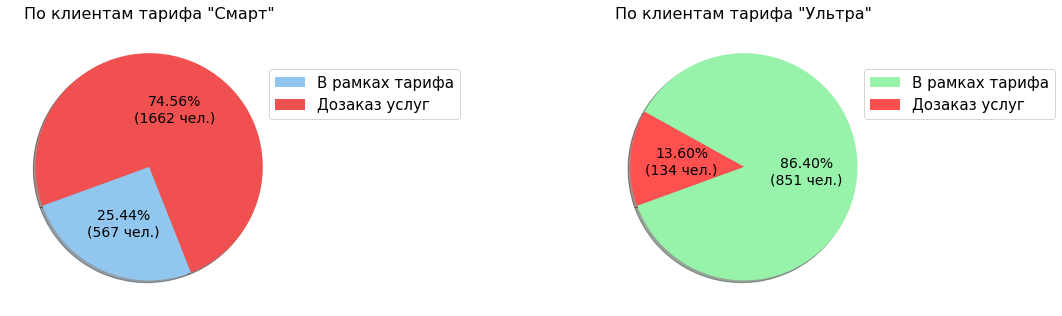

In [55]:
filter_list = ['smart', 'ultra']
titles_list = ['По клиентам тарифа "Смарт"', 'По клиентам тарифа "Ультра"']
rows = 1
cols = 2
filter_list_counter = 0

sum_smart = df_event_numbers[df_event_numbers['Тариф'] == 'smart'].count()['User_id']
sum_ultra = df_event_numbers[df_event_numbers['Тариф'] == 'ultra'].count()['User_id']

annot_labels = ['В рамках тарифа', 'Дозаказ услуг']

def func_pct(pct):
    if pct < 75 and pct > 25:
        value = float(pct/100.*sum_smart)
    else:
        value = float(pct/100.*sum_ultra)
    return "{:.2f}%\n({:.0f} чел.)".format(pct, value)

fig, axes = plt.subplots(rows, cols, figsize=(20,10))


for r in range(rows):
    for c in range(cols):
        if filter_list[filter_list_counter] == 'smart':
            colors = ['#91c6Ef', '#f05050']
        else:
            colors = ['#97F2AA', '#ff5050']
        curr_filtered_df = df_event_numbers[df_event_numbers['Тариф'] == filter_list[filter_list_counter]].groupby('Не хватило тарифного плана')['User_id']
        ax = curr_filtered_df.count().plot(kind='pie', fontsize=14, use_index=False, shadow=True, 
                                           title=titles_list[filter_list_counter], pctdistance=0.55, figsize=(20,5),
                                           autopct=lambda pct: func_pct(pct), startangle=200, ax=axes[c], colors=colors,
                                           labels=None)

        filter_list_counter += 1

plt.tight_layout(pad=3)

for ax in axes:
    ax.legend(['В рамках тарифа', 'Дозаказ услуг'], bbox_to_anchor=(0.897,0.87), prop={'size':15})
    ax.set_ylabel('')
    ax.title.set_size(16)
    ax.title.set_position([0.5, 1.15])

Видим, что по тарифу <font color=#0F74F1><b>Смарт</b></font> примерно в 75% случаев клиенту не хватает заложенных в абонентскую плату минут, СМС или гигабайт, и он "дозаказывает" эти услуги.<br/>
И наоборот, почти всем клиентам с тарифом <font color=#20B605><b>Ультра</b></font> всегда всего хватает, кроме 13% - они тоже "дозаказывают" услуги вне поверх абонентской платы.

### <b>Перплаты</b><a name = '3.2'></a></br>

Построим гистограмму переплат для тарифа <font color=#0F74F1><b>Смарт</b></font>

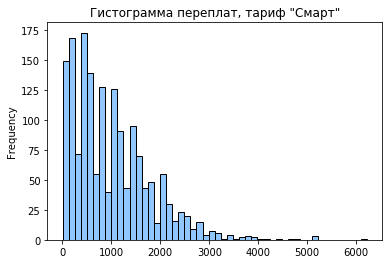

In [56]:
title = 'Гистограмма переплат, тариф "Смарт"'
df_filtered = df_event_numbers[(df_event_numbers['Тариф'] == 'smart') & 
                               (df_event_numbers['Плата сверх лимита, руб.'] > 0)]['Плата сверх лимита, руб.']
df_filtered.plot(kind='hist', title=title, ec='black', bins=50)

Большинство переплачивает до 1200 рублей. Это довольно много, учитывая, что размер абонентский платы - 550 рублей.<br/>
Посмотрим ближе:

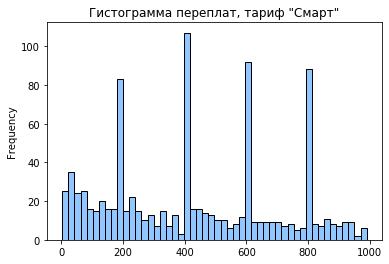

In [57]:
title = 'Гистограмма переплат, тариф "Смарт"'
df_filtered_less1000 = df_event_numbers[(df_event_numbers['Тариф'] == 'smart') & 
                                        (df_event_numbers['Плата сверх лимита, руб.'] > 0) &
                                        (df_event_numbers['Плата сверх лимита, руб.'] < 1000)]['Плата сверх лимита, руб.']
df_filtered_less1000.plot(kind='hist', title=title, ec='black', bins=50)

Большая часть клиентов если переплачивает, то переплачивает сумму, кратную 200 рублям. То есть дозаказывают разное количество раз 1 Гб интернета за 200 рублей.

Посмотрим на гистограмму "переплат" клиентов тарифа <font color=#20B605><b>Ультра</b></font>:

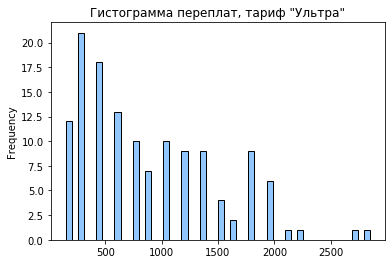

In [58]:
title = 'Гистограмма переплат, тариф "Ультра"'
df_filtered = df_event_numbers[(df_event_numbers['Тариф'] == 'ultra') & 
                               (df_event_numbers['Плата сверх лимита, руб.'] > 0)]['Плата сверх лимита, руб.']
df_filtered.plot(kind='hist', title=title, ec='black', bins=50)

В основном, переплаты до 1500 рублей. Посмотрим поближе:

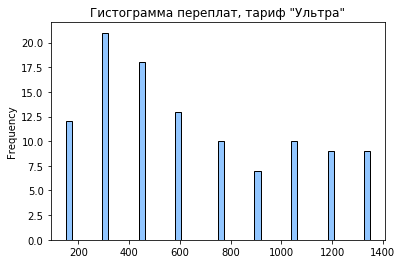

In [59]:
title = 'Гистограмма переплат, тариф "Ультра"'
df_filtered_less1000 = df_event_numbers[(df_event_numbers['Тариф'] == 'ultra') & 
                                        (df_event_numbers['Плата сверх лимита, руб.'] > 0) &
                                        (df_event_numbers['Плата сверх лимита, руб.'] < 1500)]['Плата сверх лимита, руб.']
df_filtered_less1000.plot(kind='hist', title=title, ec='black', bins=50)

Переплачивают по 150р. за дополнительный 1 Гб интернет-трафика различное количество раз.

### <b>Какие услуги чаще заказывают и сравнение суммарной выручки</b><a name = '3.3'></a></br>

In [60]:
(df_event_numbers.groupby('Тариф').sum()[['Минуты сверх', 'СМС сверх', 'Мб сверх']]).reset_index()

,Тариф,Минуты сверх,СМС сверх,Мб сверх
0,smart,92739.0,12928,6142489.54
1,ultra,0.0,0,738787.90


Пользователи тарифа <font color=#0F74F1><b>Смарт</b></font> доказывают услуги каждого типа связи. Пользователи тарифа <font color=#20B605><b>Ультра</b></font> - только интернет.

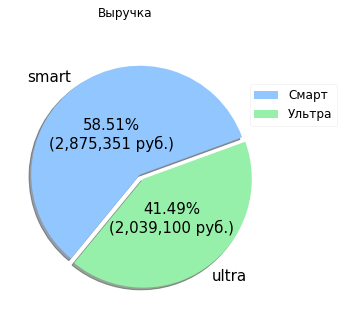

In [61]:
all_revenue = df_event_numbers['Сумма за месяц, руб.'].sum()


def func_pct(pct):
    value = float(pct/100.*all_revenue)
    return "{:.2f}%\n({:,.0f} руб.)".format(pct, value)

explode = (0.05, 0)  # сектор 'ultra' немного выдвинем

axes = df_event_numbers.groupby('Тариф')['Сумма за месяц, руб.'].sum().plot(kind='pie', subplots=True, fontsize=15,
                                                                     use_index=False, shadow=True, explode=explode,
                                                                     title = 'Выручка', pctdistance=0.45,
                                                                     startangle=20, figsize=(20,5),
                                                                     autopct=lambda pct: func_pct(pct))

for ax in axes:
    ax.legend(['Смарт', 'Ультра'], bbox_to_anchor=(0.87,0.87), framealpha=0.2, prop={'size':12})
    ax.set_ylabel('')

<font size="4"><b>58.5% выручки приносят клиенты, пользующиеся тарифом <font color=#0F74F1><b>Смарт</b></font>.</b></font><br/>
Взяли количеством.

### <b>Промежуточный вывод по анализу</b><a name = '3.4'></a></br>

<html>
<body>
<table border="1" cellspacing="0" cellpadding="0">
<tr>
<td> &nbsp; </td>
<td colspan=2 style="text-align:center;"><b>Кол-во абонентов</b></td>
<td colspan=2 style="text-align:center;"><b>Звонки</b></td>
<td colspan=2 style="text-align:center;"><b>СМС</b></td>
<td colspan=2 style="text-align:center;"><b>Интернет</b></td>
<td colspan=2 style="text-align:center;"><b>Выручка</b></td>    
</tr>
<tr>
<td style="background-color:#92c6ff; font-size: 12px;"> <b>Тариф "Смарт" </b></td>
<td style="color:#16B4DC; font-size: 15px;" ><b>69,3 % </b></td>
<td>2229 чел.</td>
<td style="color:#16B4DC; font-size: 15px;" ><b>64,2 % </b></td>
<td>931 577 мин</td>
<td style="color:#16B4DC; font-size: 15px;" ><b>60,5 % </b></td>
<td>74413 шт.</td>
<td style="color:#16B4DC; font-size: 15px;" ><b>65,3 % </b></td>
<td>35 327 Гб</td>
<td style="color:#16B4DC; font-size: 15px;" ><b>58,6 % </b></td>
<td>2,89 млн руб.</td>
</tr>
<tr>
    <td style="background-color:#97F0AA; font-size: 12px;"> <b>Тариф "Ультра"</b></td>
<td>30,7 %</td>
<td>985 чел. </td>
<td>35,8 %  </td>
<td>518 724 мин</td>
<td>39,5 %  </td>
<td>48623 шт.</td>
<td>34,7 %  </td>
<td>18 745 Гб</td>
<td>41,4 % </td>
<td>2,04 млн руб.</td>
</tr>
</table>
</body>
</html>

Больше людей пользуются тарифом <font color=#0F74F1><b>Смарт</b></font>, больше трафика проходит через тариф <font color=#0F74F1><b>Смарт</b></font>, больше отправляется смс и больше совершается звонков, и, как следствие, большую часть выручки приносит тариф <font color=#0F74F1><b>Смарт</b></font>, даже несмотря на что, что абонентская плата по тарифу <font color=#20B605><b>Ультра</b></font> в 3 раза выше.

### <b>Описание поведения клиента на основе полученной выборки</b><a name = '3.5'></a></br>
<font size="2">([к содержанию](#0.0))</font>

Сначала построим boxplot'ы по всем рассматриваемым данным:
- длительность звонка
- количество отправленных СМС
- объем использованного интернет-трафика
<br></br>
Чтобы зафиксировать выбросы и отфильтровать их при дальнейшем анализе. Сначала зададим нижнее и верхнее значения усов через 2 и 98 квантили и построим один boxplot, потом построим boxplot со стандартным межквартильным размахом, равным 1,5:

In [62]:
#Напишем функцию чтобы не создавать для каждого размаха разные ячейки кода
def plot_box(whis):
    column_list = ['Звонки, мин.', 'СМС, шт.', 'Интернет, Мб']
    rows = 1
    cols = 3
    column_list_counter = 0

    fig, axes = plt.subplots(rows, cols, figsize=(40,15))

    for r in range(rows):
        for c in range(cols):
            ax = df_event_numbers.boxplot(column=column_list[column_list_counter], by='Тариф', fontsize=40, ax=axes[c],
                                         boxprops=dict(linestyle='-', linewidth=5),
                                         medianprops=dict(linestyle='-', linewidth=5),
                                         whiskerprops=dict(linestyle='-', linewidth=5),
                                         capprops=dict(linestyle='-', linewidth=5),
                                         notch=True, whis=whis)
            ax.set_title(column_list[column_list_counter])
            ax.title.set_size(40)
            ax.set_xlabel('')
            plt.suptitle('Boxplot с whis = {}'.format(whis), y=1, fontsize=45, fontweight='bold')
            column_list_counter += 1

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

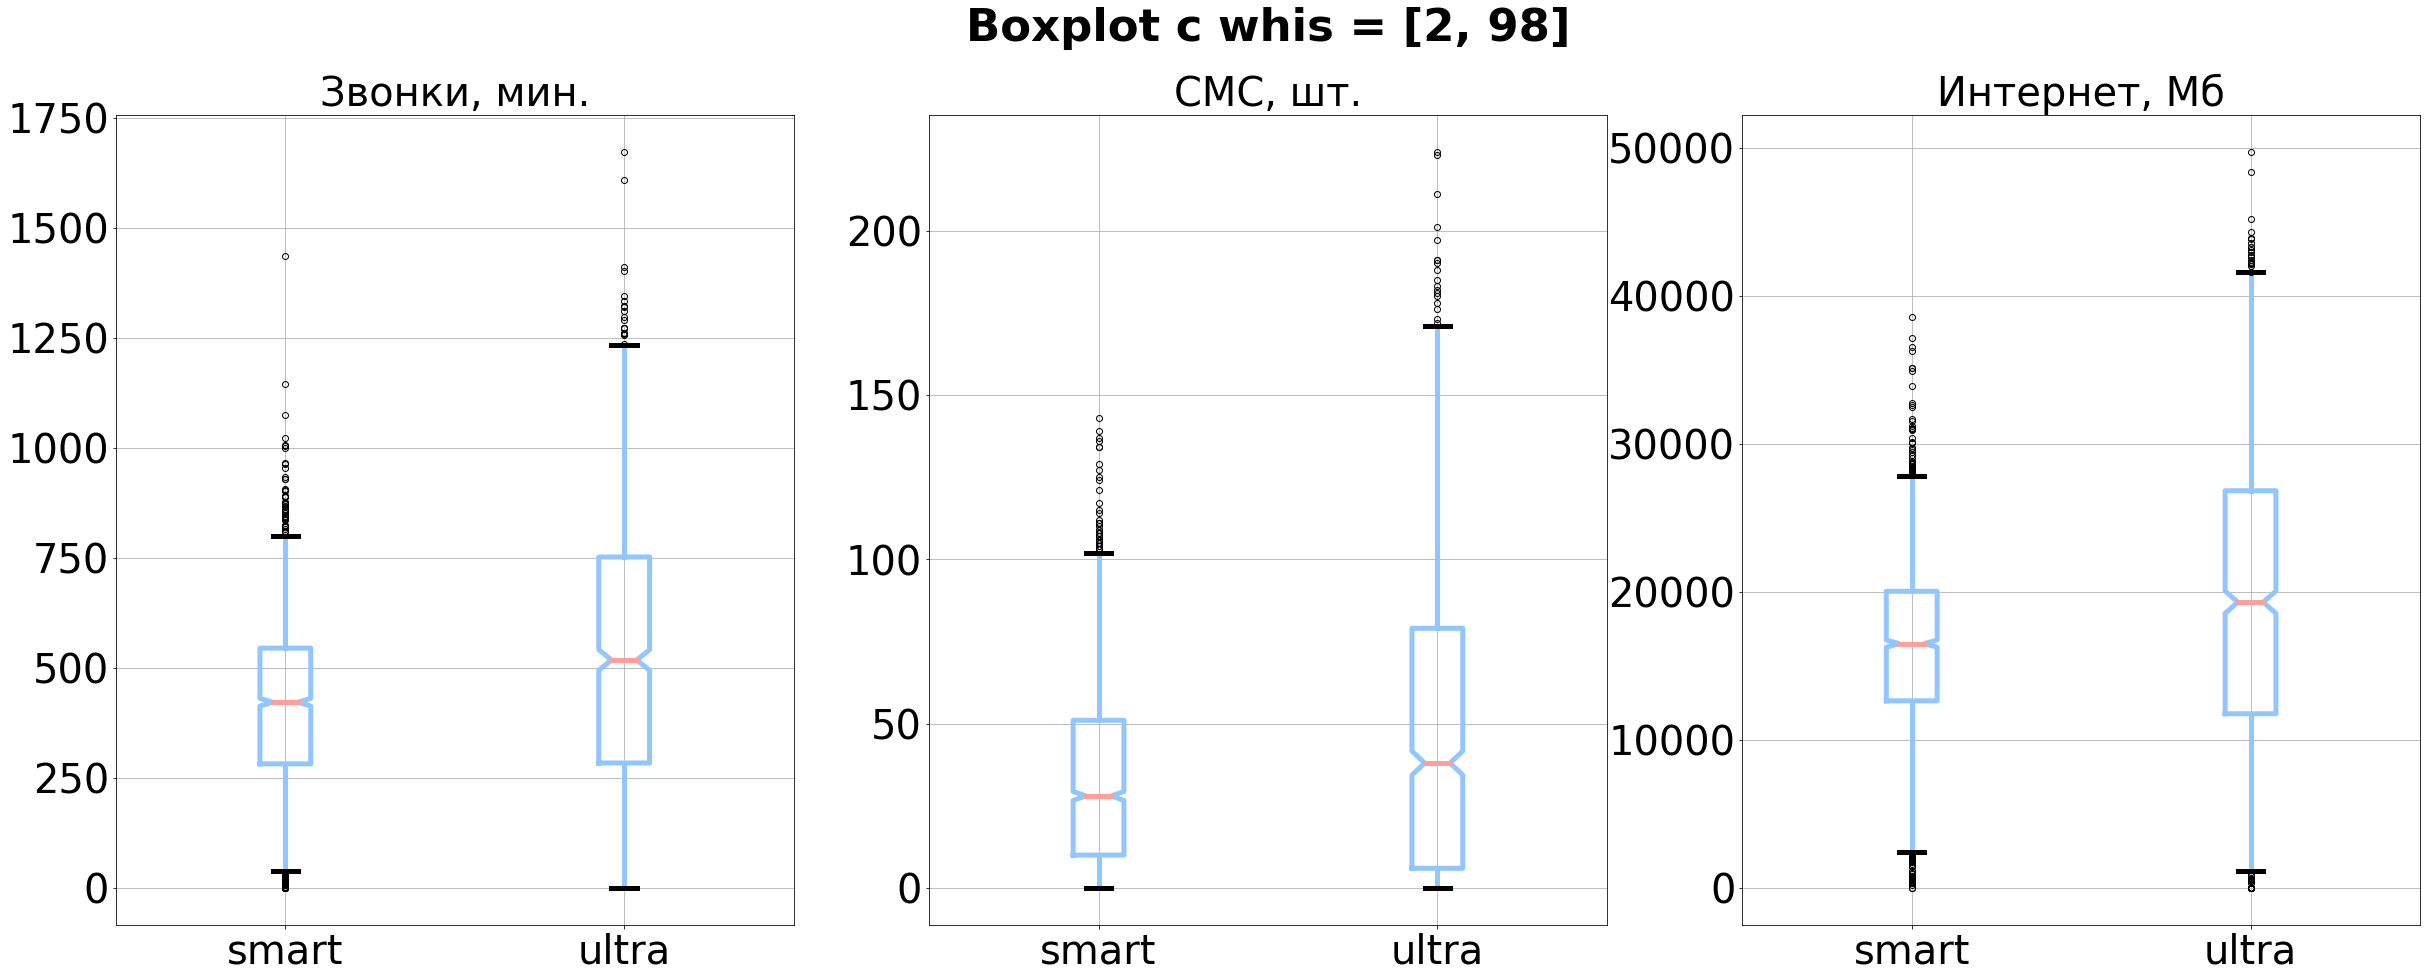

In [63]:
plot_box([2,98])

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

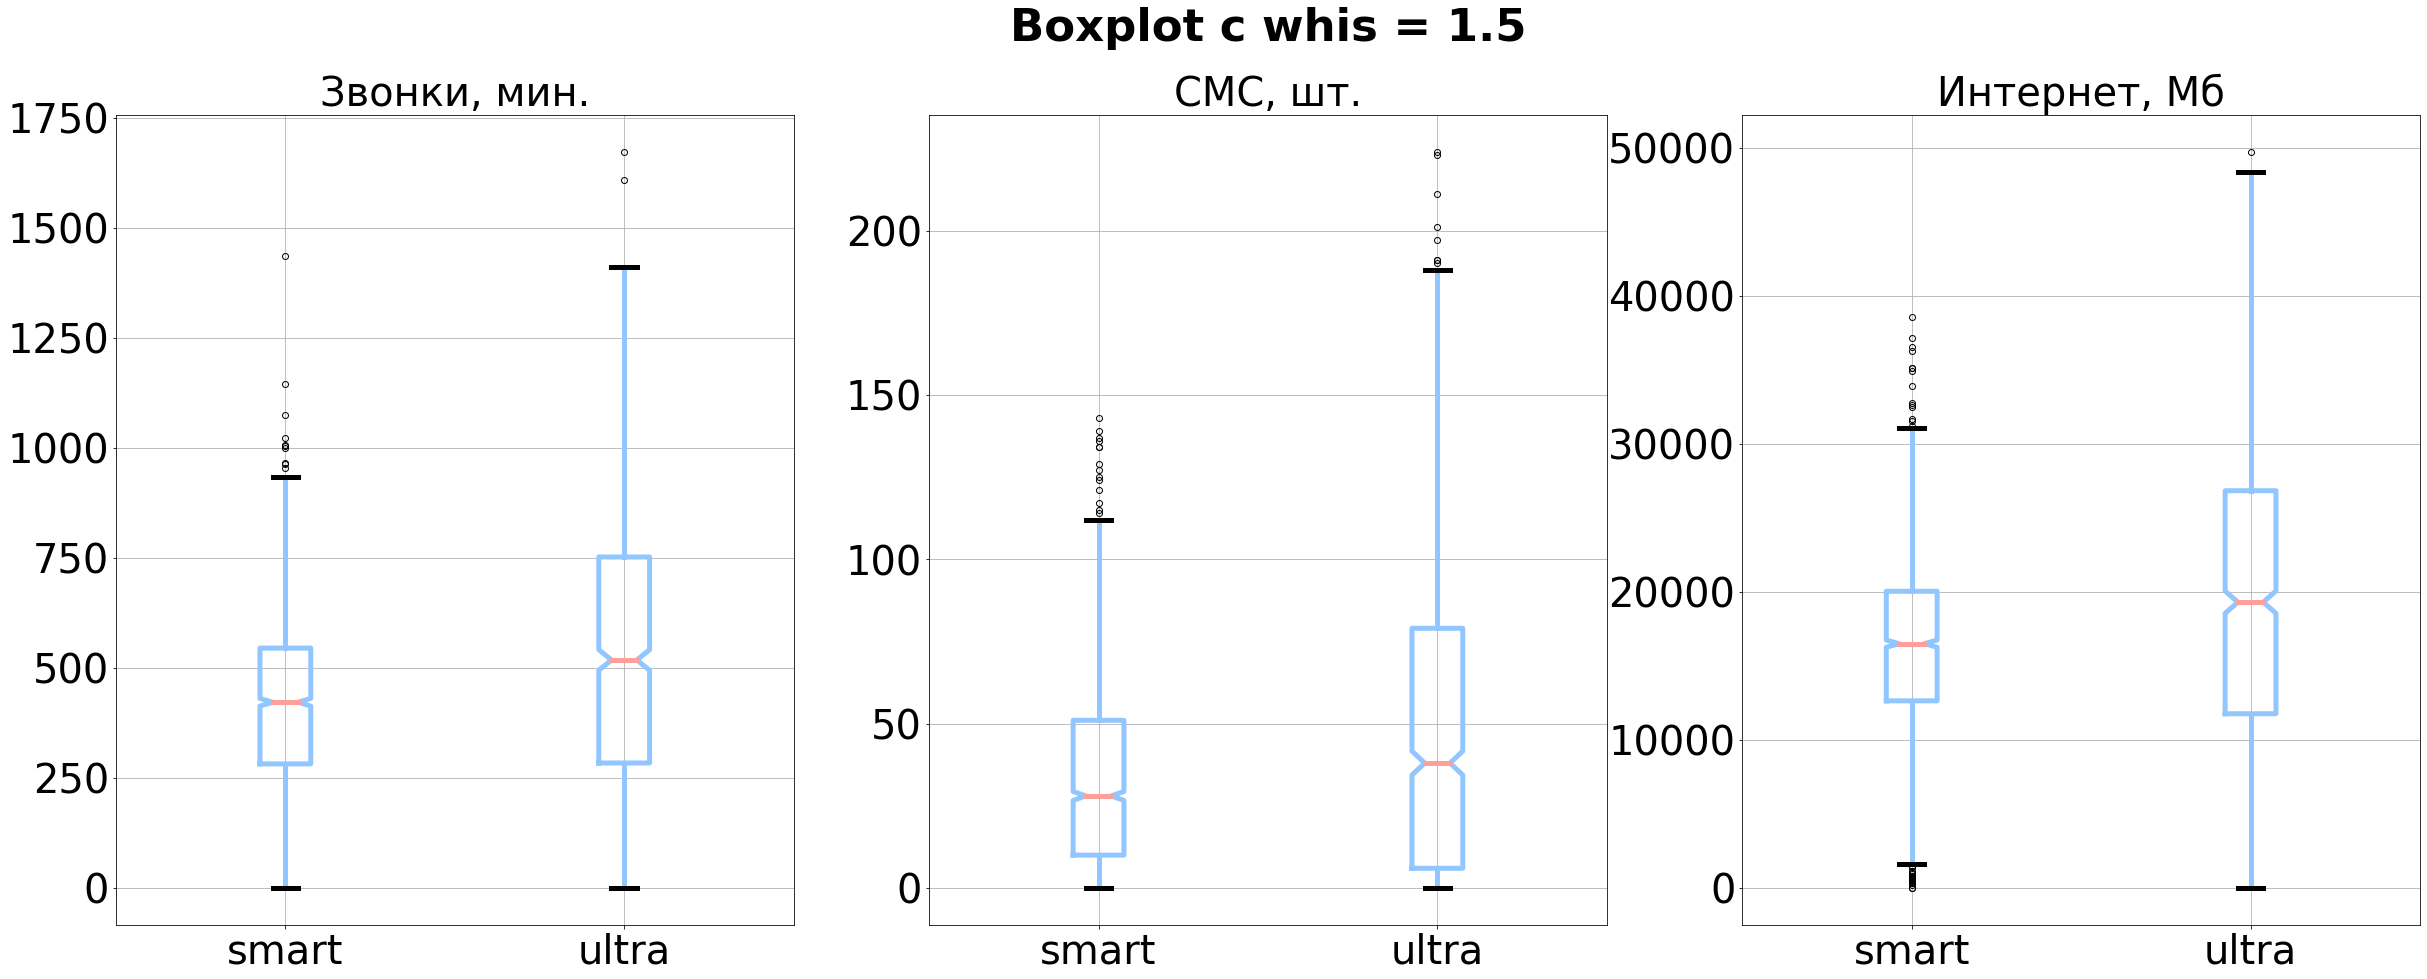

In [64]:
plot_box(1.5)

При параметре whis = 1,5 аномалий отбрасывается меньше, другими словами, мы бережней фильтруем данные, чем при [2,98].
В связи с этим, определим интервалы данных по boxplot'ам с whis = 1,5.

### <b>Определение интервалов данных для последующей их фильтрации:</b><a name = '3.6'></a></br>

Для этого напишем функцию, которая рассчитает нам эти интервалы:

In [65]:
def get_intervals(column, data_filter):
    
    if data_filter == 'Тариф':
        format_name = column
        data1, data2 = 'smart', 'ultra'
        format_end1 = 'тарифа "Смарт"'
        format_end2 = 'тарифа "Ультра"'
    elif data_filter == 'is_Moscow':
        format_name = 'is_Moscow'
        data1, data2 = 0, 1
        format_end1 = 'для регионов'
        format_end2 = 'для Москвы'
    
    q1_1 = df_event_numbers[df_event_numbers[data_filter] == data1][column].quantile(0.25)
    q3_1 = df_event_numbers[df_event_numbers[data_filter] == data1][column].quantile(0.75)
    diff_1 = q3_1 - q1_1
    
    if data_filter == 'is_Moscow':
        left_int_1 = np.where( (q1_1 - 1.5 * diff_1) > 550, q1_1 - 1.5 * diff_1, 550)
    else:
        left_int_1 = np.where( (q1_1 - 1.5 * diff_1) > 0, q1_1 - 1.5 * diff_1, 0)
    
    right_int_1 = np.where( (q3_1 + 1.5 * diff_1) > 0, q3_1 + 1.5 * diff_1, 0)
    
    q1_2 = df_event_numbers[df_event_numbers[data_filter] == data2][column].quantile(0.25)
    q3_2 = df_event_numbers[df_event_numbers[data_filter] == data2][column].quantile(0.75)
    diff_2 = q3_2 - q1_2
    
    if data_filter == 'is_Moscow':
        left_int_2 = np.where( (q1_2 - 1.5 * diff_2) > 550, q1_2 - 1.5 * diff_2, 550)
    else:
        left_int_2 = np.where( (q1_2 - 1.5 * diff_2) > 0, q1_2 - 1.5 * diff_2, 0)
        
    right_int_2 = np.where( (q3_2 + 1.5 * diff_2) > 0, q3_2 + 1.5 * diff_2, 0)
    
    print('Границы интервала для столбца "{}" {}: {} - {}'.format(column, format_end1, left_int_1, right_int_1))
    print('Границы интервала для столбца "{}" {}: {} - {}'.format(column, format_end2, left_int_2, right_int_2))
    
    return (left_int_1, right_int_1), (left_int_2, right_int_2)

In [66]:
#Найдем границы интервала по длительности звонков
calls_int_smart, calls_int_ultra = get_intervals('Звонки, мин.', 'Тариф')

Границы интервала для столбца "Звонки, мин." тарифа "Смарт": 0.0 - 939.5
Границы интервала для столбца "Звонки, мин." тарифа "Ультра": 0.0 - 1454.0


In [67]:
#Найдем границы интервала по количенству смс
sms_int_smart, sms_int_ultra = get_intervals('СМС, шт.', 'Тариф')

Границы интервала для столбца "СМС, шт." тарифа "Смарт": 0.0 - 112.5
Границы интервала для столбца "СМС, шт." тарифа "Ультра": 0.0 - 188.5


In [68]:
#Найдем границы интервала по использованому трафику
internet_int_smart, internet_int_ultra = get_intervals('Интернет, Мб', 'Тариф')

Границы интервала для столбца "Интернет, Мб" тарифа "Смарт": 1543.129999999992 - 31142.810000000005
Границы интервала для столбца "Интернет, Мб" тарифа "Ультра": 0.0 - 49438.83500000001


Построим гистограммы по тарифам по длительности звонков, по количеству отправленных смс, по количеству потраченного интернет-трафика. Помимо этого, выведем на расчетные данные по среднему, дисперсии и стандартному отклонению:

In [69]:
def plot_hist_comparison(data):
    
    ax = plt.gca()
    func_dict = {'Звонки': 'Звонки, мин.', 'СМС': 'СМС, шт.', 'Интернет': 'Интернет, Мб'}
    xlims = [(calls_int_smart[0], calls_int_smart[1]), (calls_int_ultra[0], calls_int_ultra[1]),
             (sms_int_smart[0], sms_int_smart[1]), (sms_int_ultra[0], sms_int_ultra[1]),
             (internet_int_smart[0], internet_int_smart[1]), (internet_int_ultra[0], internet_int_ultra[1])]
    
    filt_column = func_dict[data]

    # оформление в зависимости от рассматриваемых данных
    if data == 'Звонки':
        title = 'Гистограмма длительности звонков, мин.'
        xlim1 = xlims[0]
        xlim2 = xlims[1]
        text_x = (58, 8)
        text_y = 118
        count_text_x = 1150
        count_text_y = 75
        alpha = 0.8
        # annot_xy = (990, 60)
        # annot_xytext = (970, 70)
    elif data == 'СМС':
        title = 'Гистограмма количества отправленных СМС, шт.'
        xlim1 = xlims[2]
        xlim2 = xlims[3]
        text_x = (5.5, 1)
        text_y = 200
        count_text_x = 148
        count_text_y = 230
        alpha = 1
        # annot_xy = (133, 220)
        # annot_xytext = (130, 260)
    else:
        title = 'Гистограмма количества использованного интернет-трафика, Мб'
        xlim1 = xlims[4]
        xlim2 = xlims[5]
        text_x = (3300, 200)
        text_y = 130
        count_text_x = 38000
        count_text_y = 82
        alpha = 0.8
        # annot_xy = (31100, 73)
        # annot_xytext = (30400, 86)
    
    # получаем отфильтрованные от выбросов датафреймы
    filtered_smart_data = df_event_numbers[(df_event_numbers['Тариф'] == 'smart') &
                                           (df_event_numbers[filt_column] >= xlim1[0]) &
                                           (df_event_numbers[filt_column] <= xlim1[1])][filt_column]
    filtered_ultra_data = df_event_numbers[(df_event_numbers['Тариф'] == 'ultra') &
                                           (df_event_numbers[filt_column] >= xlim2[0]) &
                                           (df_event_numbers[filt_column] <= xlim2[1])][filt_column]
    # рисуем
    filtered_smart_data.plot(kind='hist', bins=40, figsize=(12,6), ec='black', ax=ax, color='#92c6ff', 
                             title=title, xlim=xlim1)
    filtered_ultra_data.plot(kind='hist', bins=70, figsize=(12,6), ec='black', ax=ax, color='#97F0AA', 
                             title=title, xlim=xlim2, alpha=alpha)
    
    # расчетные данные
    mean_smart = filtered_smart_data.mean()
    mean_ultra = filtered_ultra_data.mean()
    dispersion_smart = filtered_smart_data.var()
    dispersion_ultra = filtered_ultra_data.var()
    std_smart = filtered_smart_data.std()
    std_ultra = filtered_ultra_data.std()
    
    if data == 'СМС':
        smart_data = 'Среднее - {:.2f}\nДисперсия - {:.2f}\nstd - {:.2f}'.format(mean_smart, dispersion_smart, std_smart)
        ultra_data = 'Среднее - {:.2f}\nДисперсия - {:.2f}\nstd - {:.2f}'.format(mean_ultra, dispersion_ultra, std_ultra)
    else:
        smart_data = 'Среднее - {:.0f}\nДисперсия - {:.0f}\nstd - {:.0f}'.format(mean_smart, dispersion_smart, std_smart)
        ultra_data = 'Среднее - {:.0f}\nДисперсия - {:.0f}\nstd - {:.0f}'.format(mean_ultra, dispersion_ultra, std_ultra)
    
    legend_second = plt.legend([smart_data, ultra_data], prop={'size':10.5}, 
                                framealpha=0, bbox_to_anchor=(1.0,0.32), loc=4)
    
    
    plt.gca().add_artist(legend_second)
    
    # рисуем медианы
    plt.axvline(x=filtered_smart_data.median(),linewidth=3, color='#16B4DC', linestyle='--')
    ax.text(filtered_smart_data.median()-text_x[0], text_y, '{0:.0f}'.format(filtered_smart_data.median()), 
            fontweight='bold', fontsize='large')
    plt.axvline(x=filtered_ultra_data.median(),linewidth=3, color='#35B815', linestyle='--')
    ax.text(filtered_ultra_data.median()+text_x[1], text_y, '{0:.0f}'.format(filtered_ultra_data.median()), 
            fontweight='bold', fontsize='large')
    
    plt.legend(['Медиана Смарт', 'Медиана Ультра', 'Смарт', 'Ультра'], prop={'size':12})
    ax.text(count_text_x, count_text_y, 'Расчетные данные', fontweight='bold', fontsize='large')

### <b>Строим гистограммы</b><a name = '3.7'></a></br>

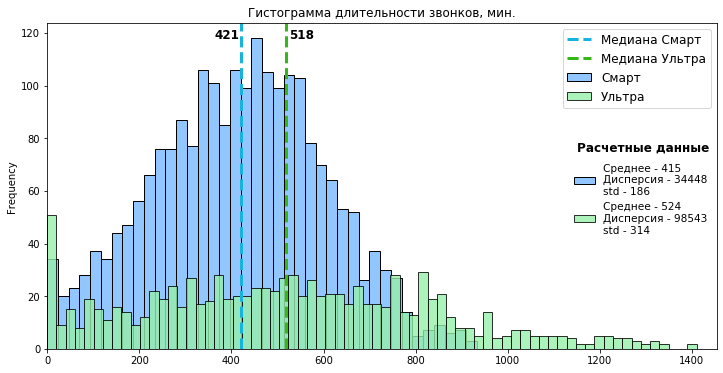

In [70]:
plot_hist_comparison('Звонки')

В основном, на тарифе <font color=#0F74F1><b>Смарт</b></font> люди разговаривают в месяц в течение 250-550 минут. Причем медиана равна 421 минуте, когда лимит общения по тарифу за абонентскую плату - 500 минут, т.е. пользователи регулярно выбирают почти полный лимит голосовой связи.<br/>
С тарифом <font color=#20B605><b>Ультра</b></font> немного иная ситуация - большая часть пользователей вообще не разговаривает голосом. Из тех, кто разговаривает, в среднем наговаривают 518 минут.<br/>
По итогу, медиана тарифа <font color=#20B605><b>Ультра</b></font> больше, чем медиана <font color=#0F74F1><b>Смарт</b></font>.

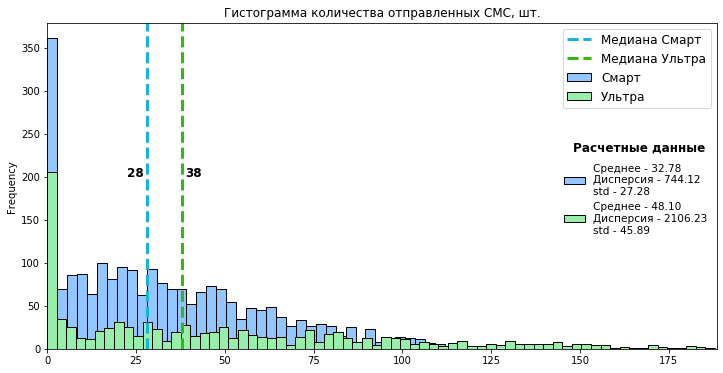

In [71]:
plot_hist_comparison('СМС')

По обоим тарифам ситуация схожая - большая часть пользователей не отправляет СМС сообщения.</br>
Однако, из тех, кто отправляет, большую активность проявляют пользователи тарифа <font color=#0F74F1><b>Смарт</b></font> - в среднем они отправляют до 30 СМС в месяц. Пользователи тарифа <font color=#0F74F1><b>Смарт</b></font> отправляют до 50 СМС.

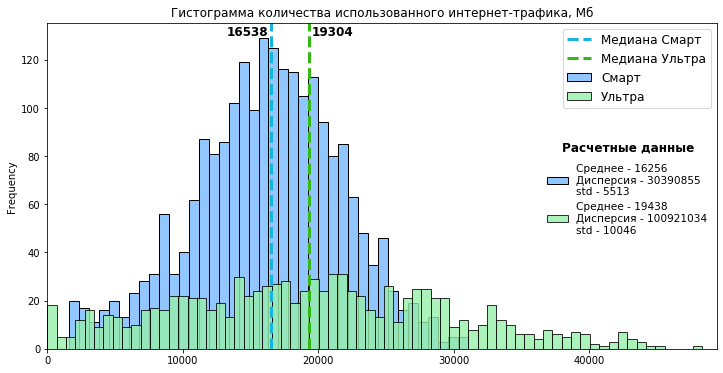

In [72]:
plot_hist_comparison('Интернет')

Клиенты с тарифом <font color=#0F74F1><b>Смарт</b></font> в среднем в месяц используют от 14 до 20 Гб трафика. Причем медиана равна 16,5 Гб, что "вылезает" за пределы, установленные абонентской платой - в 15 Гб. Фактически, клиенты тарифа <font color=#0F74F1><b>Смарт</b></font> регулярно заказывают доп. пакеты с интернетом, когда основной пакет заканчивается.<br/>
Клиенты с тарифом <font color=#20B605><b>Ультра</b></font> активней пользуются интернетом - медиана равна 19 Гб, но учитывая лимит в 30 Гб, у них есть ещё большой запас по количеству оставшегося для использования трафика.



## <br>Проверка гипотез<a name="4"></a></br>
<font size="2">([к содержанию](#0))</font>

<a name="4.1"></a><br/>
### <font><b>Первая гипотеза о равенстве средних двух генеральных совокупностей:</b><br/></font>
<b>средняя выручка пользователей тарифов <font color=#20B605><b>Ультра</b></font> и <font color=#0F74F1><b>Смарт</b></font> различается.<b>

<b>H0 (нулевая гипотеза)</b> - предположение о том, что между данными у нас нет связи. В данном случае, что средняя выручка пользователей тарифа <font color=#0F74F1><b>Смарт</b></font> <b>не отличается</b> от средней выручки пользователей тарифа <font color=#20B605><b>Ультра</b></font>.<br/>
<b>H1 (альтернативная гипотеза)</b> - средняя выручка пользователей тарифа <font color=#0F74F1><b>Смарт</b></font> <b>отличается</b> от средней выручки пользователей тарифа <font color=#20B605><b>Ультра</b></font>.<br/>

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0.93, 'Boxplot по выручке')

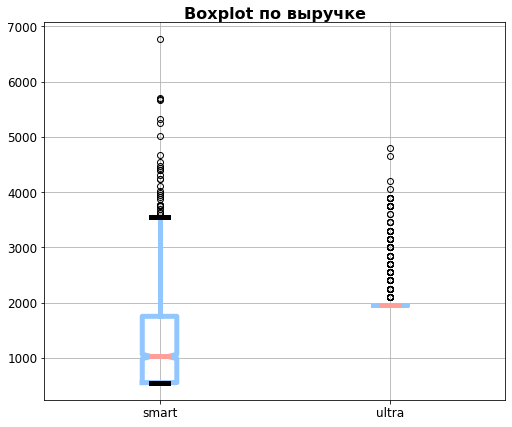

In [73]:
#Посмотрим на выборсы с 1.5 квартилем
ax = df_event_numbers.boxplot(column='Сумма за месяц, руб.', by='Тариф', fontsize=12,
                                         boxprops=dict(linestyle='-', linewidth=5),
                                         medianprops=dict(linestyle='-', linewidth=5),
                                         whiskerprops=dict(linestyle='-', linewidth=5),
                                         capprops=dict(linestyle='-', linewidth=5),
                                         notch=True, figsize=(8,7))
ax.set_title('')
ax.title.set_size(40)
ax.set_xlabel('')
plt.suptitle('Boxplot по выручке', y=0.93, fontsize=16, fontweight='bold')

Посчитаем границы и выберим нужные нам данные среднюю месяную выручку по тарифам <font color=#0F74F1><b>Смарт</b></font> и <font color=#20B605><b>Ультра</b></font>

In [74]:
revenue_int_smart, revenue_int_ultra = get_intervals('Сумма за месяц, руб.', 'Тариф')
smart_mean_revenue = df_event_numbers[(df_event_numbers['Тариф'] == 'smart') &
                                      (df_event_numbers['Сумма за месяц, руб.'] >= revenue_int_smart[0]) &
                                      (df_event_numbers['Сумма за месяц, руб.'] <= revenue_int_smart[1])]['Сумма за месяц, руб.']

ultra_mean_revenue = df_event_numbers[(df_event_numbers['Тариф'] == 'ultra') &
                                      (df_event_numbers['Сумма за месяц, руб.'] >= revenue_int_ultra[0]) &
                                      (df_event_numbers['Сумма за месяц, руб.'] <= revenue_int_ultra[1])]['Сумма за месяц, руб.']

Границы интервала для столбца "Сумма за месяц, руб." тарифа "Смарт": 0.0 - 3550.0
Границы интервала для столбца "Сумма за месяц, руб." тарифа "Ультра": 1950.0 - 1950.0


<a name="4.1.1"></a><br/>
### <font><b>Нулевая гипотеза</b><br/></font>

Подсчитаем p-value

In [75]:
stat, p = ttest_ind(smart_mean_revenue, ultra_mean_revenue)
print('t = {}\np-value = {:.10e}'.format(stat, p))
print('\nПороговое значение alpha = 0.05')

t = -28.12531985463021
p-value = 6.1993257349e-155

Пороговое значение alpha = 0.05


<a name="4.1.2"></a><br/>
### <font><b>Вывод</b><br/></font>

Нулевую гипотезу отвергаем.<br></br>
Верно утверждение, что средняя выручка пользователей тарифов Смарт и Ультра различается.<br></br>
Посмотрим, в чью пользу:

In [76]:
print('Средняя выручка по пользователям тарифа "Смарт" - {:.2f}'.format(smart_mean_revenue.mean()))
print('Средняя выручка по пользователям тарифа "Ультра" - {}'.format(ultra_mean_revenue.mean()))

Средняя выручка по пользователям тарифа "Смарт" - 1246.16
Средняя выручка по пользователям тарифа "Ультра" - 1950.0


Ожидаемо, что пользователи тарифа <font color=#20B605><b>Ультра</b></font> в среднем приносят больше денег, т.к. их абонентская плата в 3,5 раза выше, чем абонентская плата пользующихся тарифом <font color=#0F74F1><b>Смарт</b></font> (1950р. против 550р.). Клиенты с тарифом <font color=#0F74F1><b>Смарт</b></font>, конечно, довольно часто (в 75% случаев) "вылезают" за пределы своего тарифа и заказывают доп. услуги, но всё равно не догоняют по тратам на пользователя клиентов с тарифом <font color=#20B605><b>Ультра</b></font>.


<a name="4.2"></a><br/>
### <font><b>Вторая гипотеза о равенстве средних двух генеральных совокупностей:</b><br/></font>
<b>средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.</b><br/>

Выберем нужные нам данные - среднюю месячную выручку по Москве и по остальным регионам:

Проставим признак по каждой строке - Москва или регион:

In [77]:
df_event_numbers['is_Moscow'] = np.where(df_event_numbers['Город'] == 'Москва', 1, 0)

In [78]:
df_event_numbers.head()

,User_id,Месяц,"Кол-во звонков, шт.","Звонки, мин.","СМС, шт.","Интернет, Мб",Тариф,Город,"Аб. плата, руб.",Минуты сверх,СМС сверх,Мб сверх,"Плата сверх лимита, руб.","Сумма за месяц, руб.",Не хватило тарифного плана,is_Moscow
0,1000,5,22.0,159.0,22.0,2253.49,ultra,Краснодар,1950,0.0,0,0.0,0,1950,0,0
1,1000,6,43.0,172.0,60.0,23233.77,ultra,Краснодар,1950,0.0,0,0.0,0,1950,0,0
2,1000,7,47.0,340.0,75.0,14003.64,ultra,Краснодар,1950,0.0,0,0.0,0,1950,0,0
3,1000,8,52.0,408.0,81.0,14055.93,ultra,Краснодар,1950,0.0,0,0.0,0,1950,0,0
4,1000,9,58.0,466.0,57.0,14568.91,ultra,Краснодар,1950,0.0,0,0.0,0,1950,0,0


/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


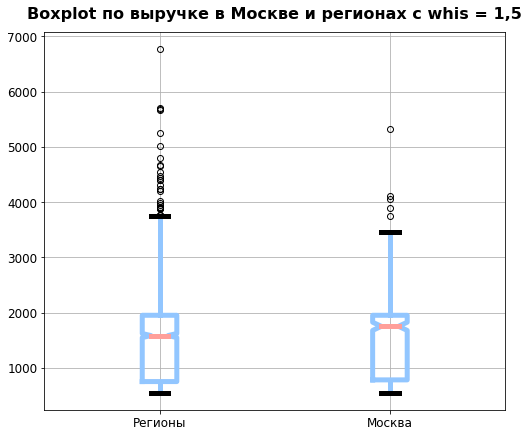

In [79]:
ax = df_event_numbers.boxplot(column='Сумма за месяц, руб.', by='is_Moscow', fontsize=12,
                                         boxprops=dict(linestyle='-', linewidth=5),
                                         medianprops=dict(linestyle='-', linewidth=5),
                                         whiskerprops=dict(linestyle='-', linewidth=5),
                                         capprops=dict(linestyle='-', linewidth=5),
                                         notch=True, figsize=(8,7))



labels = [item.get_text() for item in ax.get_xticklabels()]

labels[0] = 'Регионы'
labels[1] = 'Москва'

ax.set_xticklabels(labels)

plt.suptitle('Boxplot по выручке в Москве и регионах с whis = 1,5', y=0.95, fontsize=16, fontweight='bold')

ax.set_xlabel('')
ax.set_title('')
ax.title.set_size(40)

In [80]:
#Расчет границы интервалов и выборка данных
revenue_int_smart, revenue_int_ultra = get_intervals('Сумма за месяц, руб.', 'is_Moscow')
moscow_revenue = df_event_numbers[(df_event_numbers['Город'] == 'Москва') &
                                  (df_event_numbers['Сумма за месяц, руб.'] >= revenue_int_smart[0]) &
                                  (df_event_numbers['Сумма за месяц, руб.'] <= revenue_int_smart[1])]['Сумма за месяц, руб.']

regions_revenue = df_event_numbers[(df_event_numbers['Город'] != 'Москва') &
                                  (df_event_numbers['Сумма за месяц, руб.'] >= revenue_int_ultra[0]) &
                                  (df_event_numbers['Сумма за месяц, руб.'] <= revenue_int_ultra[1])]['Сумма за месяц, руб.']

Границы интервала для столбца "Сумма за месяц, руб." для регионов: 550.0 - 3750.0
Границы интервала для столбца "Сумма за месяц, руб." для Москвы: 550.0 - 3704.25


<a name="4.2.1"></a><br/>
### <font><b>Расчет p-value</b><br/></font>

In [81]:
stat, p = ttest_ind(moscow_revenue, regions_revenue)
print('t = {}\np-value = {:.2}'.format(stat, p))
print('\nПороговое значение alpha = 0.05')

t = 1.4426413860035516
p-value = 0.15

Пороговое значение alpha = 0.05


<a name="4.2.2"></a><br/>
### <font><b>Вывод</b><br/></font>

Нулевую гипотезу отвергнуть не получается.
Таким образом, верно утверждение, что средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.


<a name="5."></a>
## Общий вывод
<font size="2">([к содержанию](#0))</font>

Cоберем общие данные по тарифам по части использования включенных в абонентскую плату лимитов и по части дозаказываемых (пакетов) услуг:

In [82]:
smart_mean_internet = (df_event_numbers[(df_event_numbers['Тариф'] == 'smart')]['Интернет, Мб']/(1024 * 15)).mean()
print('Средний процент использования пакета интернет-трафика по тарифу "Смарт" - {:.2%} = {:,.0f} Гб'.
      format(smart_mean_internet, smart_mean_internet * 1024 * 15))
smart_mean_calls = (df_event_numbers[(df_event_numbers['Тариф'] == 'smart')]['Звонки, мин.']/(500)).mean()
print('Средний процент использования пакета минут по тарифу "Смарт" - {:.2%} = {:.2f} мин'.
      format(smart_mean_calls, smart_mean_calls * 500))
smart_mean_sms = (df_event_numbers[(df_event_numbers['Тариф'] == 'smart')]['СМС, шт.']/(50)).mean()
print('Средний процент использования пакета СМС по тарифу "Смарт" - {:.2%} = {:.0f} шт.'.
      format(smart_mean_sms, smart_mean_sms * 50))
print('---------------------------------------------------------------------------------')
ultra_mean_internet = (df_event_numbers[(df_event_numbers['Тариф'] == 'ultra')]['Интернет, Мб']/(1024 * 30)).mean()
print('Средний процент использования пакета интернет-трафика по тарифу "Ультра" - {:.2%} = {:,.0f} Гб'.
      format(ultra_mean_internet, ultra_mean_internet * 1024 * 30))
ultra_mean_calls = (df_event_numbers[(df_event_numbers['Тариф'] == 'ultra')]['Звонки, мин.']/(3000)).mean()
print('Средний процент использования пакета минут по тарифу "Ультра" - {:.2%} = {:.2f} мин'.
      format(ultra_mean_calls, ultra_mean_calls * 3000))
ultra_mean_sms = (df_event_numbers[(df_event_numbers['Тариф'] == 'ultra')]['СМС, шт.']/(1000)).mean()
print('Средний процент использования пакета СМС по тарифу "Ультра" - {:.2%} = {:.0f} шт.'.
      format(ultra_mean_sms, ultra_mean_sms * 1000))

Средний процент использования пакета интернет-трафика по тарифу "Смарт" - 105.52% = 16,208 Гб
Средний процент использования пакета минут по тарифу "Смарт" - 83.59% = 417.93 мин
Средний процент использования пакета СМС по тарифу "Смарт" - 66.77% = 33 шт.
---------------------------------------------------------------------------------
Средний процент использования пакета интернет-трафика по тарифу "Ультра" - 63.38% = 19,469 Гб
Средний процент использования пакета минут по тарифу "Ультра" - 17.55% = 526.62 мин
Средний процент использования пакета СМС по тарифу "Ультра" - 4.94% = 49 шт.


<br/>
<html>
<body>
<table border="1" cellspacing="0" cellpadding="0">
<tr>
<td> &nbsp; </td>
<td colspan=3 style="text-align:center;"><b>Средний % использования пакета интернет</b></td>
<td colspan=3 style="text-align:center;"><b>Средний % использования пакета минут</b></td>
<td colspan=3 style="text-align:center;"><b>Средний % использования пакета СМС</b></td>  
</tr>
<tr>
<td style="background-color:#92c6ff; font-size: 12px;"> <b>Тариф "Смарт" </b></td>
<td> Лимит по тарифу - 15 Гб </td>
<td style="color:#F1160F; font-size: 15px;" ><b>105,7 % </b></td>
<td style="color:#F1160F; font-size: 15px;" ><b>16,3 Гб</b></td>
<td> Лимит по тарифу - 500 мин </td>
<td style="color:#ff5050; font-size: 15px;" ><b>83,6 % </b></td>
<td style="color:#ff5050; font-size: 15px;" ><b>418 мин</b></td>
<td> Лимит по тарифу - 50 шт. </td>
<td>66,8 %</td>
<td>33 шт.</td>
<td> &nbsp; </td>
</tr>
<tr>
<td style="background-color:#97F0AA; font-size: 12px;"> <b>Тариф "Ультра"</b></td>
<td> Лимит по тарифу - 30 Гб </td>
<td>63,4 %</td>
<td>19,5 Гб</td>
<td> Лимит по тарифу - 3000 мин </td>
<td style="color:#3F8DEE; font-size: 15px;" ><b>17,6 %</b></td>
<td style="color:#3F8DEE; font-size: 15px;" ><b>526 мин</b></td>
<td> Лимит по тарифу - 1000 шт. </td>
<td style="color:#0F74F1; font-size: 15px;" ><b>4,9 %</b></td>
<td style="color:#0F74F1; font-size: 15px;" ><b>49 шт.</b></td>
</tr>
</table>
</body>
</html>

Красным отмечены критичные или почти критичные позиции - где лимитов пользователям недостаточно, синим (с оттенками) - где лимиты используются менее чем на 20% (5%).

Информация по переплатам:

In [83]:
smart_over_mean_internet = df_event_numbers[(df_event_numbers['Тариф'] == 'smart')]['Мб сверх'].mean()
smart_over_mean_internet_rub = np.round(smart_over_mean_internet, -3)/1000 * 200
print('Среднее превышение пакета интернет по тарифу "Смарт" - {:.0f} Мб на сумму - {:.0f} руб.'.
      format(smart_over_mean_internet, smart_over_mean_internet_rub))

smart_over_mean_calls = np.ceil(df_event_numbers[(df_event_numbers['Тариф'] == 'smart')]['Минуты сверх'].mean())
smart_over_mean_calls_rub = smart_over_mean_calls * 3
print('Среднее превышение пакета минут по тарифу "Смарт" - {:.0f} мин на сумму - {:.0f} руб.'.
      format(smart_over_mean_calls, smart_over_mean_calls_rub))

smart_over_mean_sms = np.ceil(df_event_numbers[(df_event_numbers['Тариф'] == 'smart')]['СМС сверх'].mean())
smart_over_mean_sms_rub = smart_over_mean_sms * 3
print('Среднее превышение пакета СМС по тарифу "Смарт" - {:.0f} шт. на сумму - {:.0f} руб.'.
      format(smart_over_mean_sms, smart_over_mean_sms_rub))

print('----------------------------------------------------------------')

ultra_over_mean_internet = df_event_numbers[(df_event_numbers['Тариф'] == 'ultra')]['Мб сверх'].mean()
ultra_over_mean_internet_rub = np.round(ultra_over_mean_internet, -3)/1000 * 150
print('Среднее превышение пакета интернет по тарифу "Ультра" - {:.0f} Мб на сумму - {:.0f} руб.'.
      format(ultra_over_mean_internet, ultra_over_mean_internet_rub))

ultra_over_mean_calls = np.ceil(df_event_numbers[(df_event_numbers['Тариф'] == 'ultra')]['Минуты сверх'].mean())
ultra_over_mean_calls_rub = ultra_over_mean_calls * 3
print('Среднее превышение пакета минут по тарифу "Ультра" - {:.0f} мин на сумму - {:.0f} руб.'.
      format(ultra_over_mean_calls, ultra_over_mean_calls_rub))

ultra_over_mean_sms = np.ceil(df_event_numbers[(df_event_numbers['Тариф'] == 'ultra')]['СМС сверх'].mean())
ultra_over_mean_sms_rub = ultra_over_mean_sms * 3
print('Среднее превышение пакета СМС по тарифу "Ультра" - {:.0f} шт. на сумму - {:.0f} руб.'.
      format(ultra_over_mean_sms, ultra_over_mean_sms_rub))

Среднее превышение пакета интернет по тарифу "Смарт" - 2756 Мб на сумму - 600 руб.
Среднее превышение пакета минут по тарифу "Смарт" - 42 мин на сумму - 126 руб.
Среднее превышение пакета СМС по тарифу "Смарт" - 6 шт. на сумму - 18 руб.
----------------------------------------------------------------
Среднее превышение пакета интернет по тарифу "Ультра" - 750 Мб на сумму - 150 руб.
Среднее превышение пакета минут по тарифу "Ультра" - 0 мин на сумму - 0 руб.
Среднее превышение пакета СМС по тарифу "Ультра" - 0 шт. на сумму - 0 руб.


<br/>
<html>
<body>
<table border="1">
<tr>
<td> &nbsp; </td>
<td colspan=2 style="text-align:center;"><strong style="font-size:11px;"><b>Среднее превышение пакета интернет и переплата</b></strong></td>
<td colspan=2 style="text-align:center;"><strong style="font-size:11px;"><b>Среднее превышение пакета минут и переплата</b></strong></td>
<td colspan=2 style="text-align:center;"><strong style="font-size:11px;"><b>Среднее превышение пакета минут пакета СМС и переплата</b></strong></td>  
</tr>
<tr>
<td style="background-color:#92c6ff; font-size: 12px;"> <b>Тариф "Смарт" </b></td>
<td>2771 Мб</td>
<td>600 руб.</td>
<td>42 мин</td>
<td>126 руб.</td>
<td>6 шт.</td>
<td>18 руб.</td>
</tr>
<tr>
<td style="background-color:#97F0AA; font-size: 11px;"> <b>Тариф "Ультра"</b></td>
<td>755 Мб</td>
<td>150 руб.</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>
</table>
</body>
</html>

Для наглядности еще раз выведем информацию по выручке по тарифам

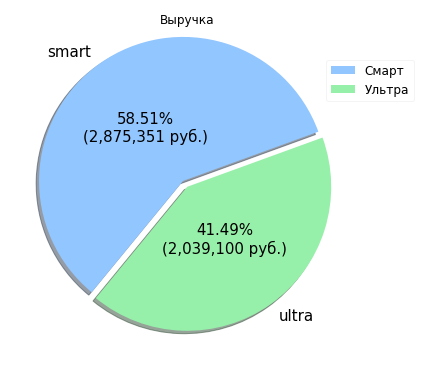

In [84]:
all_revenue = df_event_numbers['Сумма за месяц, руб.'].sum()


def func_pct(pct):
    value = float(pct/100.*all_revenue)
    return "{:.2f}%\n({:,.0f} руб.)".format(pct, value)

explode = (0.05, 0)  # сектор 'ultra' немного выдвинем

axes = df_event_numbers.groupby('Тариф')['Сумма за месяц, руб.'].sum().plot(kind='pie', subplots=True, fontsize=15,
                                                                     use_index=False, shadow=True, explode=explode,
                                                                     title = 'Выручка', pctdistance=0.45,
                                                                     startangle=20, figsize=(20,5),
                                                                     autopct=lambda pct: func_pct(pct))

for ax in axes:
    ax.legend(['Смарт', 'Ультра'], bbox_to_anchor=(0.87,0.87), framealpha=0.2, prop={'size':12})
    ax.set_ylabel('')
    
ax.title.set_size(40)
plt.tight_layout(pad=0)

Тариф <font color=#0F74F1><b>Смарт</b></font> приносит около 60% всей выручки, но при этом на него приходится 2200 пользователей. Тариф <font color=#20B605><b>Ультра</b></font> дает остальные 40%, но эту выручку генерируют всего 1000 пользователей.<br/>
Среднему пользователю тарифа <font color=#0F74F1><b>Смарт</b></font> не хватает 2 Гб интернета к заложенными в абонентскую плату 15 Гб и ему приходится дозаказывать эти 2 Гб и доплачивать за них 400 рублей.<br/>
Если рассматривать только тех пользователей <font color=#0F74F1><b>Смарт</b></font>, кто вылезает за лимиты по интернет-трафику, то средний размер доп. заказа интернет-трафика равен 3 Гб, за которые они платят 600 рублей.<br/><br/>
Таким образом, в тарифной сетке есть дешевый тариф <font color=#0F74F1><b>Смарт</b></font> за 550 рублей, где пользователю не хватает интернета и количество использованных минут разговора на грани лимита (418 мин из 500), и есть тариф <font color=#20B605><b>Ультра</b></font>, стоимостью 1950 рублей, которым пользуется уже другой класс граждан, где лимитов по всем типам связи предостаточно (иногда дозаказывают в среднем 1 Гб интернета).<br/>
<br/><br/>